## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  39.519452   433.963713  0.024125  4.878481  0.345751
1  70.881908   247.390471  0.403572  1.053290  1.043051
2  17.646335   282.447404  0.812760  7.437962  1.429251
3  63.371024  1436.011955  0.903997  6.658720  1.466566
4  58.011350  1221.488226  0.257985  1.078418  1.353216


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.81851 | train_mse: 6.98124 | train_mae: 2.07403 |  0:00:00s
epoch 1  | loss: 0.77011 | train_mse: 5.97258 | train_mae: 1.66657 |  0:00:00s
epoch 2  | loss: 0.54371 | train_mse: 4.78575 | train_mae: 1.4635  |  0:00:00s


epoch 3  | loss: 0.53281 | train_mse: 4.3186  | train_mae: 1.41538 |  0:00:00s
epoch 4  | loss: 0.6566  | train_mse: 3.71762 | train_mae: 1.23584 |  0:00:00s
epoch 5  | loss: 0.4261  | train_mse: 4.64274 | train_mae: 1.37303 |  0:00:00s


epoch 6  | loss: 0.58603 | train_mse: 3.78258 | train_mae: 1.29575 |  0:00:00s
epoch 7  | loss: 0.41113 | train_mse: 2.43538 | train_mae: 1.05898 |  0:00:00s
epoch 8  | loss: 0.29328 | train_mse: 1.88967 | train_mae: 0.954   |  0:00:00s
epoch 9  | loss: 0.25955 | train_mse: 1.93026 | train_mae: 1.01248 |  0:00:00s


epoch 10 | loss: 0.3937  | train_mse: 1.82408 | train_mae: 0.95251 |  0:00:00s
epoch 11 | loss: 0.31586 | train_mse: 1.03911 | train_mae: 0.71577 |  0:00:00s
epoch 12 | loss: 0.27695 | train_mse: 0.40597 | train_mae: 0.47047 |  0:00:01s


epoch 13 | loss: 0.28222 | train_mse: 0.2337  | train_mae: 0.36276 |  0:00:01s
epoch 14 | loss: 0.27757 | train_mse: 0.31458 | train_mae: 0.41804 |  0:00:01s
epoch 15 | loss: 0.25796 | train_mse: 0.28564 | train_mae: 0.40471 |  0:00:01s


epoch 16 | loss: 0.41546 | train_mse: 0.31867 | train_mae: 0.42568 |  0:00:01s
epoch 17 | loss: 0.29072 | train_mse: 0.26058 | train_mae: 0.39194 |  0:00:01s
epoch 18 | loss: 0.36423 | train_mse: 0.21352 | train_mae: 0.35013 |  0:00:01s
epoch 19 | loss: 0.28354 | train_mse: 0.21159 | train_mae: 0.35155 |  0:00:01s


epoch 20 | loss: 0.36526 | train_mse: 0.23652 | train_mae: 0.3692  |  0:00:01s
epoch 21 | loss: 0.26774 | train_mse: 0.26711 | train_mae: 0.38699 |  0:00:01s
epoch 22 | loss: 0.35235 | train_mse: 0.22362 | train_mae: 0.37027 |  0:00:01s
epoch 23 | loss: 0.4097  | train_mse: 0.26833 | train_mae: 0.37059 |  0:00:01s


epoch 24 | loss: 0.31914 | train_mse: 0.403   | train_mae: 0.44988 |  0:00:01s
epoch 25 | loss: 0.45676 | train_mse: 0.55016 | train_mae: 0.5239  |  0:00:01s
epoch 26 | loss: 0.34696 | train_mse: 0.4555  | train_mae: 0.49937 |  0:00:01s
epoch 27 | loss: 0.38745 | train_mse: 0.45862 | train_mae: 0.50538 |  0:00:02s


epoch 28 | loss: 0.29102 | train_mse: 0.38115 | train_mae: 0.46497 |  0:00:02s
epoch 29 | loss: 0.26885 | train_mse: 0.31154 | train_mae: 0.41549 |  0:00:02s
epoch 30 | loss: 0.32114 | train_mse: 0.304   | train_mae: 0.45401 |  0:00:02s


epoch 31 | loss: 0.34181 | train_mse: 0.32582 | train_mae: 0.46692 |  0:00:02s
epoch 32 | loss: 0.46024 | train_mse: 0.28707 | train_mae: 0.43291 |  0:00:02s
epoch 33 | loss: 0.26795 | train_mse: 0.25982 | train_mae: 0.39563 |  0:00:02s


epoch 34 | loss: 0.28588 | train_mse: 0.28134 | train_mae: 0.39215 |  0:00:02s
epoch 35 | loss: 0.20982 | train_mse: 0.31421 | train_mae: 0.41687 |  0:00:02s
epoch 36 | loss: 0.41185 | train_mse: 0.393   | train_mae: 0.46803 |  0:00:02s
epoch 37 | loss: 0.24733 | train_mse: 0.34614 | train_mae: 0.45736 |  0:00:02s


epoch 38 | loss: 0.19438 | train_mse: 0.3054  | train_mae: 0.43072 |  0:00:02s
epoch 39 | loss: 0.25518 | train_mse: 0.34318 | train_mae: 0.42457 |  0:00:02s
epoch 40 | loss: 0.37604 | train_mse: 0.5174  | train_mae: 0.50231 |  0:00:02s
epoch 41 | loss: 0.27803 | train_mse: 0.45021 | train_mae: 0.47824 |  0:00:03s


epoch 42 | loss: 0.23425 | train_mse: 0.31607 | train_mae: 0.42302 |  0:00:03s
epoch 43 | loss: 0.24362 | train_mse: 0.22772 | train_mae: 0.34417 |  0:00:03s


epoch 44 | loss: 0.24142 | train_mse: 0.22064 | train_mae: 0.31942 |  0:00:03s
epoch 45 | loss: 0.2784  | train_mse: 0.19955 | train_mae: 0.31526 |  0:00:03s
epoch 46 | loss: 0.27917 | train_mse: 0.19697 | train_mae: 0.31694 |  0:00:03s


epoch 47 | loss: 0.35282 | train_mse: 0.18412 | train_mae: 0.30671 |  0:00:03s
epoch 48 | loss: 0.24362 | train_mse: 0.19749 | train_mae: 0.33626 |  0:00:03s
epoch 49 | loss: 0.185   | train_mse: 0.18455 | train_mae: 0.3309  |  0:00:03s


epoch 50 | loss: 0.43836 | train_mse: 0.16972 | train_mae: 0.31535 |  0:00:03s
epoch 51 | loss: 0.20806 | train_mse: 0.16166 | train_mae: 0.2844  |  0:00:03s
epoch 52 | loss: 0.30173 | train_mse: 0.17077 | train_mae: 0.29186 |  0:00:03s


epoch 53 | loss: 0.22581 | train_mse: 0.15978 | train_mae: 0.28243 |  0:00:04s
epoch 54 | loss: 0.18731 | train_mse: 0.17188 | train_mae: 0.31671 |  0:00:04s
epoch 55 | loss: 0.32917 | train_mse: 0.19986 | train_mae: 0.33654 |  0:00:04s


epoch 56 | loss: 0.20003 | train_mse: 0.15267 | train_mae: 0.28206 |  0:00:04s
epoch 57 | loss: 0.23159 | train_mse: 0.16768 | train_mae: 0.28653 |  0:00:04s
epoch 58 | loss: 0.26992 | train_mse: 0.16982 | train_mae: 0.30222 |  0:00:04s


epoch 59 | loss: 0.20209 | train_mse: 0.15653 | train_mae: 0.30075 |  0:00:04s
epoch 60 | loss: 0.19874 | train_mse: 0.13828 | train_mae: 0.27135 |  0:00:04s
epoch 61 | loss: 0.15607 | train_mse: 0.14315 | train_mae: 0.28398 |  0:00:04s


epoch 62 | loss: 0.18461 | train_mse: 0.15311 | train_mae: 0.29737 |  0:00:05s
epoch 63 | loss: 0.29102 | train_mse: 0.17551 | train_mae: 0.29979 |  0:00:05s
epoch 64 | loss: 0.22083 | train_mse: 0.24633 | train_mae: 0.34872 |  0:00:05s


epoch 65 | loss: 0.16452 | train_mse: 0.23196 | train_mae: 0.34799 |  0:00:05s
epoch 66 | loss: 0.22818 | train_mse: 0.16496 | train_mae: 0.30944 |  0:00:05s
epoch 67 | loss: 0.21428 | train_mse: 0.15275 | train_mae: 0.29744 |  0:00:05s
epoch 68 | loss: 0.16956 | train_mse: 0.10928 | train_mae: 0.2532  |  0:00:05s


epoch 69 | loss: 0.23283 | train_mse: 0.10462 | train_mae: 0.25593 |  0:00:05s
epoch 70 | loss: 0.19729 | train_mse: 0.13024 | train_mae: 0.28066 |  0:00:05s
epoch 71 | loss: 0.16453 | train_mse: 0.10583 | train_mae: 0.25647 |  0:00:05s


epoch 72 | loss: 0.13267 | train_mse: 0.1015  | train_mae: 0.24337 |  0:00:05s
epoch 73 | loss: 0.20386 | train_mse: 0.1667  | train_mae: 0.30499 |  0:00:05s
epoch 74 | loss: 0.29354 | train_mse: 0.17315 | train_mae: 0.31365 |  0:00:06s


epoch 75 | loss: 0.21145 | train_mse: 0.16711 | train_mae: 0.30761 |  0:00:06s
epoch 76 | loss: 0.13254 | train_mse: 0.1294  | train_mae: 0.27005 |  0:00:06s
epoch 77 | loss: 0.20327 | train_mse: 0.10192 | train_mae: 0.23167 |  0:00:06s


epoch 78 | loss: 0.19473 | train_mse: 0.11145 | train_mae: 0.24493 |  0:00:06s
epoch 79 | loss: 0.17394 | train_mse: 0.12516 | train_mae: 0.25459 |  0:00:06s
epoch 80 | loss: 0.17095 | train_mse: 0.13474 | train_mae: 0.26589 |  0:00:06s
epoch 81 | loss: 0.12418 | train_mse: 0.13479 | train_mae: 0.25724 |  0:00:06s


epoch 82 | loss: 0.12271 | train_mse: 0.14238 | train_mae: 0.27051 |  0:00:06s
epoch 83 | loss: 0.29239 | train_mse: 0.16633 | train_mae: 0.29508 |  0:00:06s
epoch 84 | loss: 0.13959 | train_mse: 0.16644 | train_mae: 0.3033  |  0:00:06s
epoch 85 | loss: 0.13263 | train_mse: 0.17135 | train_mae: 0.30526 |  0:00:06s


epoch 86 | loss: 0.11878 | train_mse: 0.17336 | train_mae: 0.29256 |  0:00:06s
epoch 87 | loss: 0.13742 | train_mse: 0.1132  | train_mae: 0.24258 |  0:00:06s
epoch 88 | loss: 0.14124 | train_mse: 0.11264 | train_mae: 0.24895 |  0:00:07s
epoch 89 | loss: 0.17833 | train_mse: 0.12042 | train_mae: 0.25613 |  0:00:07s


epoch 90 | loss: 0.13579 | train_mse: 0.11916 | train_mae: 0.25025 |  0:00:07s
epoch 91 | loss: 0.16496 | train_mse: 0.12411 | train_mae: 0.25553 |  0:00:07s
epoch 92 | loss: 0.24503 | train_mse: 0.16061 | train_mae: 0.28187 |  0:00:07s


epoch 93 | loss: 0.28848 | train_mse: 0.13275 | train_mae: 0.27909 |  0:00:07s
epoch 94 | loss: 0.14354 | train_mse: 0.1157  | train_mae: 0.2659  |  0:00:07s
epoch 95 | loss: 0.23542 | train_mse: 0.12123 | train_mae: 0.26562 |  0:00:07s
epoch 96 | loss: 0.16274 | train_mse: 0.12356 | train_mae: 0.27064 |  0:00:07s
epoch 97 | loss: 0.11615 | train_mse: 0.10756 | train_mae: 0.24913 |  0:00:07s


epoch 98 | loss: 0.19189 | train_mse: 0.09565 | train_mae: 0.2341  |  0:00:07s
epoch 99 | loss: 0.14335 | train_mse: 0.0925  | train_mae: 0.2302  |  0:00:07s
epoch 100| loss: 0.12284 | train_mse: 0.08725 | train_mae: 0.23052 |  0:00:07s
epoch 101| loss: 0.18643 | train_mse: 0.09356 | train_mae: 0.2427  |  0:00:07s


epoch 102| loss: 0.12055 | train_mse: 0.0839  | train_mae: 0.2365  |  0:00:07s
epoch 103| loss: 0.17601 | train_mse: 0.09761 | train_mae: 0.25653 |  0:00:08s
epoch 104| loss: 0.10352 | train_mse: 0.09263 | train_mae: 0.25163 |  0:00:08s
epoch 105| loss: 0.2445  | train_mse: 0.06731 | train_mae: 0.20588 |  0:00:08s


epoch 106| loss: 0.13355 | train_mse: 0.09435 | train_mae: 0.22867 |  0:00:08s
epoch 107| loss: 0.13133 | train_mse: 0.08228 | train_mae: 0.21131 |  0:00:08s
epoch 108| loss: 0.07481 | train_mse: 0.08893 | train_mae: 0.22379 |  0:00:08s
epoch 109| loss: 0.18941 | train_mse: 0.09597 | train_mae: 0.24908 |  0:00:08s


epoch 110| loss: 0.08947 | train_mse: 0.08498 | train_mae: 0.2319  |  0:00:08s
epoch 111| loss: 0.20088 | train_mse: 0.07169 | train_mae: 0.21017 |  0:00:08s
epoch 112| loss: 0.16714 | train_mse: 0.06525 | train_mae: 0.20903 |  0:00:08s
epoch 113| loss: 0.18809 | train_mse: 0.06362 | train_mae: 0.20066 |  0:00:08s


epoch 114| loss: 0.11342 | train_mse: 0.08529 | train_mae: 0.22271 |  0:00:08s
epoch 115| loss: 0.18449 | train_mse: 0.09066 | train_mae: 0.22672 |  0:00:08s
epoch 116| loss: 0.13029 | train_mse: 0.0934  | train_mae: 0.22816 |  0:00:08s


epoch 117| loss: 0.21172 | train_mse: 0.08506 | train_mae: 0.22526 |  0:00:08s
epoch 118| loss: 0.07245 | train_mse: 0.07253 | train_mae: 0.20897 |  0:00:09s
epoch 119| loss: 0.09645 | train_mse: 0.06692 | train_mae: 0.20211 |  0:00:09s
epoch 120| loss: 0.0615  | train_mse: 0.08357 | train_mae: 0.21903 |  0:00:09s


epoch 121| loss: 0.1998  | train_mse: 0.13883 | train_mae: 0.26454 |  0:00:09s
epoch 122| loss: 0.12876 | train_mse: 0.11284 | train_mae: 0.24509 |  0:00:09s
epoch 123| loss: 0.12408 | train_mse: 0.11613 | train_mae: 0.24664 |  0:00:09s


epoch 124| loss: 0.12252 | train_mse: 0.12441 | train_mae: 0.25134 |  0:00:09s
epoch 125| loss: 0.13041 | train_mse: 0.10051 | train_mae: 0.23134 |  0:00:09s
epoch 126| loss: 0.13325 | train_mse: 0.09662 | train_mae: 0.23181 |  0:00:09s
epoch 127| loss: 0.09768 | train_mse: 0.13002 | train_mae: 0.25876 |  0:00:09s


epoch 128| loss: 0.0793  | train_mse: 0.14641 | train_mae: 0.26954 |  0:00:09s
epoch 129| loss: 0.15258 | train_mse: 0.14395 | train_mae: 0.26943 |  0:00:09s
epoch 130| loss: 0.15658 | train_mse: 0.11341 | train_mae: 0.24513 |  0:00:09s
epoch 131| loss: 0.22564 | train_mse: 0.09324 | train_mae: 0.22728 |  0:00:09s


epoch 132| loss: 0.0869  | train_mse: 0.06817 | train_mae: 0.2056  |  0:00:09s
epoch 133| loss: 0.14932 | train_mse: 0.07934 | train_mae: 0.21758 |  0:00:10s
epoch 134| loss: 0.18475 | train_mse: 0.10569 | train_mae: 0.24538 |  0:00:10s
epoch 135| loss: 0.16339 | train_mse: 0.0712  | train_mae: 0.2125  |  0:00:10s


epoch 136| loss: 0.11641 | train_mse: 0.0622  | train_mae: 0.19542 |  0:00:10s
epoch 137| loss: 0.10036 | train_mse: 0.07413 | train_mae: 0.21693 |  0:00:10s
epoch 138| loss: 0.17185 | train_mse: 0.06762 | train_mae: 0.21172 |  0:00:10s
epoch 139| loss: 0.10443 | train_mse: 0.06749 | train_mae: 0.20951 |  0:00:10s


epoch 140| loss: 0.11154 | train_mse: 0.06261 | train_mae: 0.20119 |  0:00:10s
epoch 141| loss: 0.10369 | train_mse: 0.07276 | train_mae: 0.21206 |  0:00:10s
epoch 142| loss: 0.15755 | train_mse: 0.08068 | train_mae: 0.21973 |  0:00:10s
epoch 143| loss: 0.13039 | train_mse: 0.12065 | train_mae: 0.25064 |  0:00:10s


epoch 144| loss: 0.09536 | train_mse: 0.13208 | train_mae: 0.26329 |  0:00:10s
epoch 145| loss: 0.13937 | train_mse: 0.09664 | train_mae: 0.23474 |  0:00:10s
epoch 146| loss: 0.08523 | train_mse: 0.06993 | train_mae: 0.20329 |  0:00:10s
epoch 147| loss: 0.34579 | train_mse: 0.05104 | train_mae: 0.18022 |  0:00:10s


epoch 148| loss: 0.13901 | train_mse: 0.06896 | train_mae: 0.20003 |  0:00:11s
epoch 149| loss: 0.13645 | train_mse: 0.11574 | train_mae: 0.24824 |  0:00:11s
epoch 150| loss: 0.10174 | train_mse: 0.1332  | train_mae: 0.26628 |  0:00:11s
epoch 151| loss: 0.11104 | train_mse: 0.12633 | train_mae: 0.26508 |  0:00:11s


epoch 152| loss: 0.12611 | train_mse: 0.11089 | train_mae: 0.25032 |  0:00:11s
epoch 153| loss: 0.27659 | train_mse: 0.10881 | train_mae: 0.24377 |  0:00:11s
epoch 154| loss: 0.17648 | train_mse: 0.0967  | train_mae: 0.22575 |  0:00:11s


epoch 155| loss: 0.10032 | train_mse: 0.08733 | train_mae: 0.21159 |  0:00:11s
epoch 156| loss: 0.11183 | train_mse: 0.07719 | train_mae: 0.19962 |  0:00:11s
epoch 157| loss: 0.11901 | train_mse: 0.08547 | train_mae: 0.21053 |  0:00:11s
epoch 158| loss: 0.11523 | train_mse: 0.09875 | train_mae: 0.22613 |  0:00:11s


epoch 159| loss: 0.07234 | train_mse: 0.12101 | train_mae: 0.24477 |  0:00:11s
epoch 160| loss: 0.1512  | train_mse: 0.11703 | train_mae: 0.24156 |  0:00:11s
epoch 161| loss: 0.09034 | train_mse: 0.14166 | train_mae: 0.25407 |  0:00:11s
epoch 162| loss: 0.11123 | train_mse: 0.14131 | train_mae: 0.25439 |  0:00:11s


epoch 163| loss: 0.13065 | train_mse: 0.11584 | train_mae: 0.22815 |  0:00:12s
epoch 164| loss: 0.07124 | train_mse: 0.12998 | train_mae: 0.24013 |  0:00:12s
epoch 165| loss: 0.20108 | train_mse: 0.12562 | train_mae: 0.24031 |  0:00:12s


epoch 166| loss: 0.10214 | train_mse: 0.13088 | train_mae: 0.24826 |  0:00:12s
epoch 167| loss: 0.13398 | train_mse: 0.1464  | train_mae: 0.25815 |  0:00:12s
epoch 168| loss: 0.17482 | train_mse: 0.13096 | train_mae: 0.25043 |  0:00:12s


epoch 169| loss: 0.17281 | train_mse: 0.10072 | train_mae: 0.22883 |  0:00:12s
epoch 170| loss: 0.09061 | train_mse: 0.07662 | train_mae: 0.20125 |  0:00:12s
epoch 171| loss: 0.23033 | train_mse: 0.06698 | train_mae: 0.19036 |  0:00:12s


epoch 172| loss: 0.07357 | train_mse: 0.06976 | train_mae: 0.19467 |  0:00:12s
epoch 173| loss: 0.08609 | train_mse: 0.07522 | train_mae: 0.20226 |  0:00:12s
epoch 174| loss: 0.08247 | train_mse: 0.0776  | train_mae: 0.20305 |  0:00:12s
epoch 175| loss: 0.2682  | train_mse: 0.08596 | train_mae: 0.214   |  0:00:12s


epoch 176| loss: 0.1301  | train_mse: 0.09217 | train_mae: 0.21252 |  0:00:12s
epoch 177| loss: 0.09682 | train_mse: 0.11981 | train_mae: 0.241   |  0:00:13s
epoch 178| loss: 0.10948 | train_mse: 0.14468 | train_mae: 0.2593  |  0:00:13s
epoch 179| loss: 0.14268 | train_mse: 0.20987 | train_mae: 0.3025  |  0:00:13s


epoch 180| loss: 0.18757 | train_mse: 0.19136 | train_mae: 0.28677 |  0:00:13s
epoch 181| loss: 0.11639 | train_mse: 0.14359 | train_mae: 0.25997 |  0:00:13s
epoch 182| loss: 0.09661 | train_mse: 0.10963 | train_mae: 0.23298 |  0:00:13s


epoch 183| loss: 0.09849 | train_mse: 0.07644 | train_mae: 0.20478 |  0:00:13s
epoch 184| loss: 0.09225 | train_mse: 0.07441 | train_mae: 0.20625 |  0:00:13s
epoch 185| loss: 0.18561 | train_mse: 0.12877 | train_mae: 0.25865 |  0:00:13s
epoch 186| loss: 0.13021 | train_mse: 0.15474 | train_mae: 0.27559 |  0:00:13s


epoch 187| loss: 0.09369 | train_mse: 0.17723 | train_mae: 0.28791 |  0:00:13s
epoch 188| loss: 0.09098 | train_mse: 0.15856 | train_mae: 0.28415 |  0:00:13s
epoch 189| loss: 0.19192 | train_mse: 0.10337 | train_mae: 0.24005 |  0:00:13s
epoch 190| loss: 0.13342 | train_mse: 0.08937 | train_mae: 0.22517 |  0:00:13s


epoch 191| loss: 0.20329 | train_mse: 0.09014 | train_mae: 0.23537 |  0:00:13s
epoch 192| loss: 0.12611 | train_mse: 0.08259 | train_mae: 0.22703 |  0:00:14s
epoch 193| loss: 0.1425  | train_mse: 0.05437 | train_mae: 0.17915 |  0:00:14s
epoch 194| loss: 0.16099 | train_mse: 0.04507 | train_mae: 0.16207 |  0:00:14s


epoch 195| loss: 0.07069 | train_mse: 0.05875 | train_mae: 0.18314 |  0:00:14s
epoch 196| loss: 0.15242 | train_mse: 0.05907 | train_mae: 0.17871 |  0:00:14s
epoch 197| loss: 0.15719 | train_mse: 0.06863 | train_mae: 0.19456 |  0:00:14s
epoch 198| loss: 0.06441 | train_mse: 0.07098 | train_mae: 0.19753 |  0:00:14s


epoch 199| loss: 0.09818 | train_mse: 0.06594 | train_mae: 0.18878 |  0:00:14s
epoch 200| loss: 0.12447 | train_mse: 0.05615 | train_mae: 0.17817 |  0:00:14s
epoch 201| loss: 0.09663 | train_mse: 0.0473  | train_mae: 0.16859 |  0:00:14s
epoch 202| loss: 0.32079 | train_mse: 0.05543 | train_mae: 0.18966 |  0:00:14s


epoch 203| loss: 0.11079 | train_mse: 0.06557 | train_mae: 0.20745 |  0:00:14s
epoch 204| loss: 0.13117 | train_mse: 0.05908 | train_mae: 0.19775 |  0:00:14s
epoch 205| loss: 0.12144 | train_mse: 0.05859 | train_mae: 0.19724 |  0:00:14s
epoch 206| loss: 0.11272 | train_mse: 0.05897 | train_mae: 0.18758 |  0:00:14s


epoch 207| loss: 0.14447 | train_mse: 0.06607 | train_mae: 0.19424 |  0:00:15s
epoch 208| loss: 0.13885 | train_mse: 0.09156 | train_mae: 0.22519 |  0:00:15s
epoch 209| loss: 0.13109 | train_mse: 0.05664 | train_mae: 0.19212 |  0:00:15s
epoch 210| loss: 0.09564 | train_mse: 0.10575 | train_mae: 0.25137 |  0:00:15s


epoch 211| loss: 0.18354 | train_mse: 0.18586 | train_mae: 0.3167  |  0:00:15s
epoch 212| loss: 0.13521 | train_mse: 0.14902 | train_mae: 0.28849 |  0:00:15s
epoch 213| loss: 0.16947 | train_mse: 0.09524 | train_mae: 0.23876 |  0:00:15s
epoch 214| loss: 0.15685 | train_mse: 0.09737 | train_mae: 0.24342 |  0:00:15s


epoch 215| loss: 0.12996 | train_mse: 0.0971  | train_mae: 0.24306 |  0:00:15s
epoch 216| loss: 0.09082 | train_mse: 0.07343 | train_mae: 0.21775 |  0:00:15s
epoch 217| loss: 0.10408 | train_mse: 0.06518 | train_mae: 0.20558 |  0:00:15s


epoch 218| loss: 0.09929 | train_mse: 0.06888 | train_mae: 0.20273 |  0:00:15s
epoch 219| loss: 0.18653 | train_mse: 0.07188 | train_mae: 0.20263 |  0:00:15s
epoch 220| loss: 0.11596 | train_mse: 0.07083 | train_mae: 0.20392 |  0:00:15s
epoch 221| loss: 0.07642 | train_mse: 0.09115 | train_mae: 0.22484 |  0:00:15s
epoch 222| loss: 0.26626 | train_mse: 0.09104 | train_mae: 0.22644 |  0:00:16s


epoch 223| loss: 0.15407 | train_mse: 0.06862 | train_mae: 0.20325 |  0:00:16s
epoch 224| loss: 0.13298 | train_mse: 0.05622 | train_mae: 0.18553 |  0:00:16s
epoch 225| loss: 0.1374  | train_mse: 0.06196 | train_mae: 0.19289 |  0:00:16s


epoch 226| loss: 0.07617 | train_mse: 0.05199 | train_mae: 0.18624 |  0:00:16s
epoch 227| loss: 0.13143 | train_mse: 0.05394 | train_mae: 0.18671 |  0:00:16s
epoch 228| loss: 0.11693 | train_mse: 0.04893 | train_mae: 0.17811 |  0:00:16s
epoch 229| loss: 0.11961 | train_mse: 0.06598 | train_mae: 0.19923 |  0:00:16s


epoch 230| loss: 0.08097 | train_mse: 0.07701 | train_mae: 0.21228 |  0:00:16s
epoch 231| loss: 0.08177 | train_mse: 0.0699  | train_mae: 0.2055  |  0:00:16s
epoch 232| loss: 0.07374 | train_mse: 0.07568 | train_mae: 0.20829 |  0:00:16s
epoch 233| loss: 0.1404  | train_mse: 0.07848 | train_mae: 0.21139 |  0:00:16s


epoch 234| loss: 0.1652  | train_mse: 0.10545 | train_mae: 0.24028 |  0:00:16s
epoch 235| loss: 0.10345 | train_mse: 0.09648 | train_mae: 0.23706 |  0:00:16s
epoch 236| loss: 0.09953 | train_mse: 0.08623 | train_mae: 0.22472 |  0:00:16s
epoch 237| loss: 0.1877  | train_mse: 0.08542 | train_mae: 0.22405 |  0:00:17s


epoch 238| loss: 0.07924 | train_mse: 0.06767 | train_mae: 0.20452 |  0:00:17s
epoch 239| loss: 0.09249 | train_mse: 0.06029 | train_mae: 0.20038 |  0:00:17s
epoch 240| loss: 0.16162 | train_mse: 0.06215 | train_mae: 0.20348 |  0:00:17s


epoch 241| loss: 0.09211 | train_mse: 0.05497 | train_mae: 0.19365 |  0:00:17s
epoch 242| loss: 0.20003 | train_mse: 0.04728 | train_mae: 0.18238 |  0:00:17s
epoch 243| loss: 0.12765 | train_mse: 0.0563  | train_mae: 0.1889  |  0:00:17s
epoch 244| loss: 0.06436 | train_mse: 0.06252 | train_mae: 0.1923  |  0:00:17s

Early stopping occurred at epoch 244 with best_epoch = 194 and best_train_mae = 0.16207
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

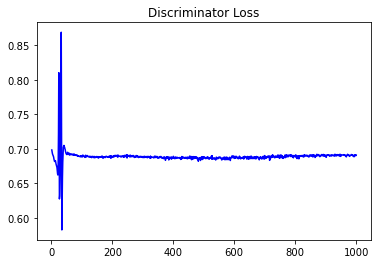

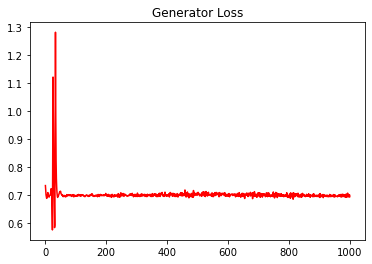

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.30784139241511205


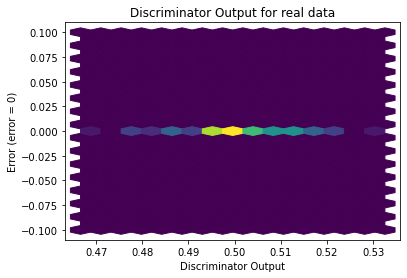

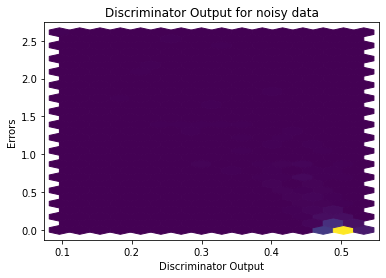

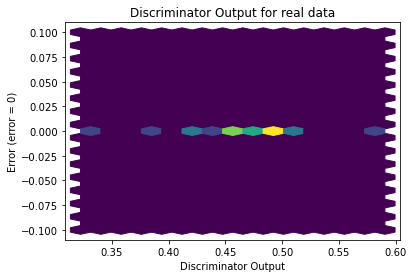

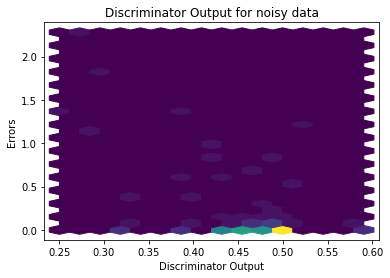

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


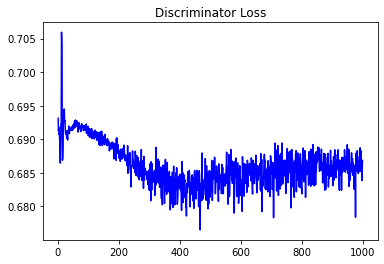

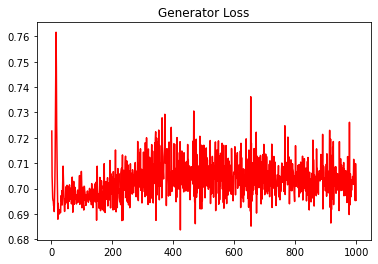

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.35548733438633734


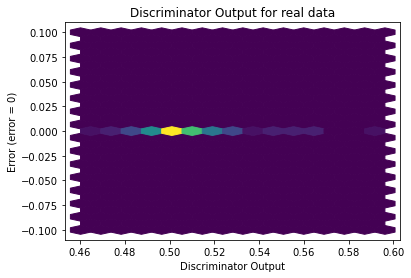

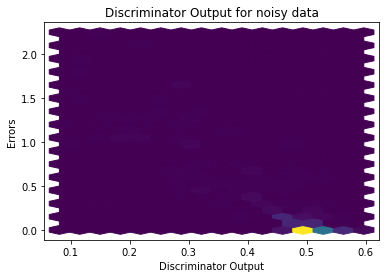

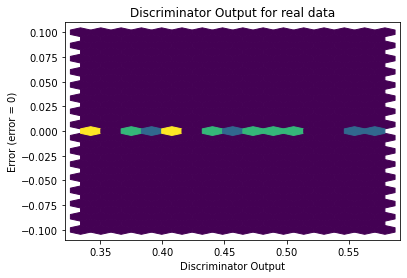

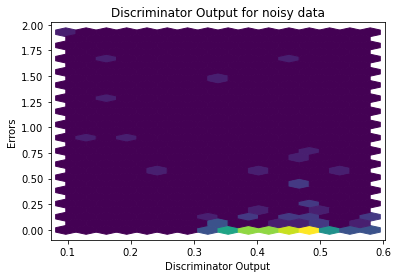

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7226]], requires_grad=True)
